<a href="https://colab.research.google.com/github/edelgado-1975/PandasOk/blob/main/01_Funciones_matem%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funciones matemáticas

En esta sección se estudiamoa la manera de aprender como hacer operaciones matematicas en un dataframe, tambien a realizar operaciones entre diferentes columnas de un mismo dataframe y utilizar otras funciones matematicas de otra libreria como numpy.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/CienciaDataAplicadaEJDA'
!ls

/content/drive/My Drive/Colab Notebooks/CienciaDataAplicadaEJDA
10_Series_de_tiempo_y_visualizacioes.ipynb
1_Funciones_matemáticas.ipynb
2_Multiples_indices.ipynb
3_Variables_tipo_texto.ipynb
4_Concatenacion_de_DataFrames.ipynb
5_Merge_de_DataFrames.ipynb
6_Datos_faltantes_DataFrames.ipynb
7_Group_by.ipynb
8_Datos_duplicados_DataFrames.ipynb
9_Group_by_Extrayendo_valor_con_variables_categóricas.ipynb
london_merged.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_lmerged = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CienciaDataAplicadaEJDA/london_merged.csv')
df_lmerged

Reconocemos nuestras variables

In [ ]:
df_lmerged.dtypes

In [ ]:
df_lmerged['timestamp'] = pd.to_datetime(df_lmerged['timestamp'])
df_lmerged['timestamp']

In [ ]:
df_lmerged.dtypes

El formato datetime podemos descomponerlo y extraer por ejemplo la hora a la cual estaba suceciendo el evento.

In [ ]:
df_lmerged['hour'] = df_lmerged['timestamp'].dt.hour
df_lmerged['hour']

Lo que haremos ahora es sacar la solumna timestamp para que solo nos queden variables tipo numericas.

In [ ]:
df = df_lmerged.iloc[:,1:]
df

¿Que operaciones matemáticas podemos hacer sobre un dataframe numérico?

Podemos elevar al cuadrado todos los elementos de una columna en especifico.

In [ ]:
df['wind_speed']**2

Podemos sumarle un valor despues de haber elevado a un valor esa columna

In [ ]:
df['wind_speed']**2 + 10

Inclusive podemos aplicarle una función seno a toda la columna y realizar todo un conjunto de operaciones.

In [ ]:
np.sin(df['wind_speed']**2) + 10

Tambien podemos realizar operaciones entre columnas, por ejemplo podemos saber la diferencia entre la temperatura **t1** y **t2**.


In [ ]:
df['t1'] - df['t2']

Puedo seleccionar datos, de 2 en 2 por ejemplo

In [ ]:
df['t1'].iloc[::2]

Puedo seleccionar datos, de 3 en 3 y restarle una columna completa y vemos lo que pasa:

In [ ]:
df['t1'].iloc[::3] - df['t2']

Si no esta el dato se completa automaticamente con una variable nula NaN.

Si ahora utilizo una función matematica para realizar la misma operación que antes, esto me da la versatilidad de rellenar los valores vacios.

In [ ]:
df['t1'].iloc[::3].sub(df['t2'], fill_value=1000)

Lo que hacemos es llenar con un valor los espacios vacios de la columna t1, en este caso 1000 y luego resto la columna t2

Podemos hacer divisiones

In [ ]:
df['t1']/df['t2']

Producto punto de un vector por el mismo.

In [ ]:
df['t1'].dot(df['t1'])

# Funciones más complejas y lambdas

En esat sección el objetivo es aprender a usar funciones mucho mas avanzadas (creandolas) en el dataframe utilizando .apply() y lambda

Creamos una función simple

In [ ]:
def fun_1(x):
  y = x**2 + 1
  return y

La aplicamos a un numero

In [ ]:
fun_1(10)

101

La aplicamos a un array

In [ ]:
np.arange(-5,6)

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [ ]:
np.arange(-5,6).shape

(11,)

In [ ]:
fun_1(np.arange(-5,6))

array([26, 17, 10,  5,  2,  1,  2,  5, 10, 17, 26])

La aplicamos a un array del dataframe (columna)

In [ ]:
df['hour']

In [ ]:
df['hour'].apply(fun_1)

Creamos una segunda función donde tenemos parametros.

In [ ]:
def fun_2(x, a=1, b=0):
  y = x**2 + a*x + b
  return y

In [ ]:
fun_2(10, a=3, b=-100)

Podemos variar estos parametros gracias a un atributo del método apply, **args**

In [ ]:
df['hour'].apply(fun_2, args=(20, -100))

O directamente podemos poner el nombre del atributo de la funcion y el valor que le vamos a dar.

In [ ]:
df['hour'].apply(fun_2, a=20, b=-100)

Podemos aplicar una función lambda para evitar hacer funciones exteriores. En este caso queremos pasar de grados celcius a kelvin, sumando a cada elemento del array el numero 273 [ver funcion LAMBDA](https://ellibrodepython.com/lambda-python)

In [ ]:
df['t1'].apply(lambda x:x+273)

Tambien podemos calcular la media de los array columnas.

In [ ]:
df.apply(lambda x:x.mean())

Pero ahora si especificamos el eje columna, lo que hacemos es calcular                                              ALMA

In [ ]:
df.apply(lambda x:x.mean(), axis=1)

In [ ]:
df.apply(lambda x:x.std(), axis=1)

In [ ]:
df.apply(lambda x:x['t1']-x['t2'], axis=1)

In [ ]:
df.applymap(lambda x:x/1000)

# **Ahora pongamos a prueba algo de matematica y fuciones netamente matematicas para ver el alcance de Python y sus librerias de IA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 **Crear un DataFrame con Funciones Matemáticas
Vamos a crear un DataFrame que contenga valores para tres funciones matemáticas:**

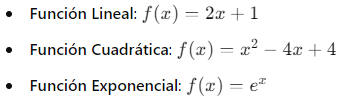

In [ ]:
# Crear un rango de valores para x
x = np.linspace(-10, 10, 400)

# Calcular los valores para cada función
linear = 2 * x + 1
quadratic = x**2 - 4 * x + 4
exponential = np.exp(x)

# Crear un DataFrame
df = pd.DataFrame({
    'x': x,
    'Lineal': linear,
    'Cuadrática': quadratic,
    'Exponencial': exponential
})

print(df)

**Graficar las Funciones Matemáticas
Usaremos Matplotlib para graficar las tres funciones.**

In [ ]:
# Crear la figura y los ejes
plt.figure(figsize=(15, 5))

# Gráfico de la función lineal
plt.subplot(1, 3, 1)
plt.plot(df['x'], df['Lineal'], color='blue')
plt.title('Función Lineal')
plt.xlabel('x')
plt.ylabel('f(x)')

# Gráfico de la función cuadrática
plt.subplot(1, 3, 2)
plt.plot(df['x'], df['Cuadrática'], color='green')
plt.title('Función Cuadrática')
plt.xlabel('x')
plt.ylabel('f(x)')

# Gráfico de la función exponencial
plt.subplot(1, 3, 3)
plt.plot(df['x'], df['Exponencial'], color='red')
plt.title('Función Exponencial')
plt.xlabel('x')
plt.ylabel('f(x)')

# Ajustar el layout
plt.tight_layout()
plt.show()
